# Some code related to polynomial interpolation

## Poly evaluation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
np.polyval([1,2,3,4], 0)  # evaluate 1*x^3 + 2*x^2 + 3*x^1 + 4 at x=5

4

Note that the first coordinate is the coefficient of the highest deg.

## Find the polynomial interpolant given n+1 points

In [4]:
def VandPolyInterp(x,y):
    # x stores n+1 x-coordinates
    # y stores n+1 y-coordinates
    n = len(x) - 1
    
    # form the Vandermonde matrix given x
    V = np.zeros((n+1,n+1))
    for i in range(0,n+1):
        V[:,i] = np.power(x,i)
    
    return np.linalg.solve(V,y)

In [5]:
# test
x = np.array([-1,0,2])
y = np.array([0,1,1])
VandPolyInterp(x,y)

array([ 1.        ,  0.66666667, -0.33333333])

## define the Runge function $R(x) = \frac{1}{1+25x^2}$.

In [6]:
def Runge(x): return 1/(1+25*x**2)

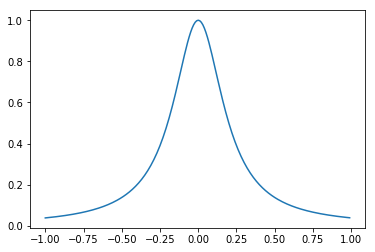

In [7]:
x = np.arange(-1,1,0.01)
plt.plot(x,Runge(x))
plt.show()

## Sample n+1 equally spaced points on this function

In [20]:
n = 10
xp = np.linspace(-1,1,n+1)
yp = Runge(xp)
xp

array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

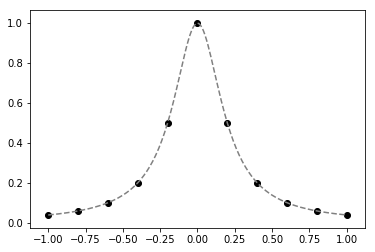

In [21]:
plt.plot(x,Runge(x), color='grey', linestyle='--')
plt.scatter(xp,yp, color='k')
plt.show()

## Now we find the polynomial of deg n that interpolate (xp,yp)

In [22]:
coeff = VandPolyInterp(xp,yp)

In [23]:
coeff

array([ 1.00000000e+00, -4.44333586e-14, -1.68552036e+01,  1.10097117e-12,
        1.23359729e+02, -6.96092214e-12, -3.81433824e+02,  1.27935856e-11,
        4.94909502e+02, -6.88920130e-12, -2.20941742e+02])

In [24]:
coeff_flip = np.flip(coeff);coeff_flip

array([-2.20941742e+02, -6.88920130e-12,  4.94909502e+02,  1.27935856e-11,
       -3.81433824e+02, -6.96092214e-12,  1.23359729e+02,  1.10097117e-12,
       -1.68552036e+01, -4.44333586e-14,  1.00000000e+00])

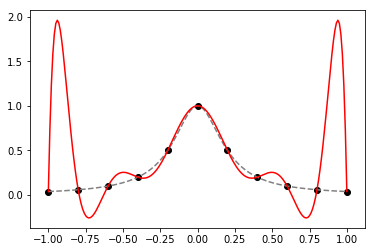

In [25]:
coeff = VandPolyInterp(xp,yp)
x = np.arange(-1,1+0.01,0.01)
plt.plot(x,Runge(x), color='grey', linestyle='--')
plt.scatter(xp,yp, color='k')
plt.plot(x,np.polyval((coeff_flip),x), color='red')
plt.show()